# 1. Pandas

Definition : pandas is a software library written for the Python programming language for data manipulation and analysis.

The name is derived from the term "Panel data", an econometrics term for multidimensional structured data sets.




데이터 분석에 특화되어있는 Library 데이터 분석기능 시 R등 다른 언어를 사용해야 하지만 데이터 가공 및 분석을 위해 



가장 큰 특징 : Index 설정 가능
Dictionary와 연관(key Value)
 - Series -> Dictionary : variable.to_dict()
 - Dictionary -> Series : Series(variable)

## 1.1 Pandas
1. Null 값 찾기 : pd.isnull()
2. Series 합치기 : series1 + series2
3. Series 이름짓기 : ~.name = "이름"
4. Index 이름짓기 : ~.index.name = "이름"


## 1.2 Dataframe
1. 표와 같은 스프레드 형식의 자료구조(2차원)

In [2]:
import pandas as pd
import pandas_datareader.data
import requests
import datetime

In [3]:
CODE='005930.KS'
DataFrame = pandas_datareader.data.DataReader(CODE, "yahoo", '1970-01-01', datetime.datetime.now())
DataFrame

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,300000.0,305500.0,283000.0,305500.0,1483900,283670.08
2000-01-05,290000.0,303000.0,276000.0,279000.0,1493600,259063.67
2000-01-06,287500.0,289000.0,279000.0,281000.0,1087800,260920.76
2000-01-07,278000.0,283500.0,268000.0,277000.0,806100,257206.58
2000-01-10,280000.0,288500.0,279000.0,288500.0,937600,267884.84
2000-01-11,291000.0,305000.0,288500.0,288500.0,1194900,267884.84
2000-01-12,280500.0,287000.0,280000.0,286000.0,584400,265563.48
2000-01-13,280000.0,287000.0,278000.0,285500.0,823800,265099.21
2000-01-14,286000.0,294000.0,284000.0,291500.0,987500,270670.47


In [32]:
DataFrame.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [33]:
DataFrame.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09',
               '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15',
               '2017-03-16', '2017-03-17'],
              dtype='datetime64[ns]', name='Date', length=4467, freq=None)

In [19]:
DataFrame.ix[0]

Open          300000.00
High          305500.00
Low           283000.00
Close         305500.00
Volume       1483900.00
Adj Close     283670.08
Name: 2000-01-04 00:00:00, dtype: float64

In [17]:
DataFrame.head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,300000.0,305500.0,283000.0,305500.0,1483900,283670.08
2000-01-05,290000.0,303000.0,276000.0,279000.0,1493600,259063.67
2000-01-06,287500.0,289000.0,279000.0,281000.0,1087800,260920.76


In [18]:
DataFrame.tail(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-16,2090000.0,2109000.0,2077000.0,2092000.0,198600,2092000.0
2017-03-17,2090000.0,2125000.0,2086000.0,2120000.0,252000,2120000.0


In [20]:
DataFrame['2013']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-01-01,1522000.0,1522000.0,1522000.0,1522000.0,0,1436267.33
2013-01-02,1533000.0,1576000.0,1527000.0,1576000.0,228900,1487225.57
2013-01-03,1582000.0,1584000.0,1543000.0,1543000.0,284500,1456084.43
2013-01-04,1540000.0,1542000.0,1510000.0,1525000.0,259900,1439098.35
2013-01-07,1515000.0,1528000.0,1500000.0,1520000.0,252200,1434379.99
2013-01-08,1513000.0,1517000.0,1498000.0,1500000.0,276400,1415506.57
2013-01-09,1500000.0,1513000.0,1491000.0,1500000.0,253100,1415506.57
2013-01-10,1515000.0,1534000.0,1500000.0,1530000.0,293200,1443816.70
2013-01-11,1548000.0,1548000.0,1507000.0,1533000.0,238200,1446647.72


In [21]:
DataFrame['2017-01']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,1799000.0,1812000.0,1794000.0,1805000.0,93000,1805000.0
2017-01-03,1814000.0,1831000.0,1801000.0,1824000.0,147100,1824000.0
2017-01-04,1825000.0,1826000.0,1805000.0,1808000.0,159400,1808000.0
2017-01-05,1803000.0,1803000.0,1777000.0,1778000.0,219300,1778000.0
2017-01-06,1809000.0,1822000.0,1802000.0,1810000.0,177600,1810000.0
2017-01-09,1830000.0,1875000.0,1828000.0,1861000.0,263800,1861000.0
2017-01-10,1864000.0,1870000.0,1854000.0,1862000.0,181900,1862000.0
2017-01-11,1876000.0,1928000.0,1871000.0,1914000.0,240300,1914000.0
2017-01-12,1900000.0,1940000.0,1899000.0,1940000.0,233300,1940000.0


In [22]:
DataFrame['2016-07-01':'2017-12-31']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,1427000.0,1479000.0,1427000.0,1466000.0,287800,1443590.33
2016-07-04,1464000.0,1474000.0,1451000.0,1466000.0,159900,1443590.33
2016-07-05,1466000.0,1475000.0,1462000.0,1469000.0,157400,1446544.47
2016-07-06,1447000.0,1452000.0,1412000.0,1421000.0,334900,1399278.21
2016-07-07,1421000.0,1450000.0,1416000.0,1450000.0,229900,1427834.91
2016-07-08,1450000.0,1475000.0,1449000.0,1460000.0,269900,1437682.05
2016-07-11,1460000.0,1500000.0,1460000.0,1489000.0,281100,1466238.75
2016-07-12,1499000.0,1505000.0,1460000.0,1464000.0,220400,1441620.91
2016-07-13,1496000.0,1496000.0,1463000.0,1481000.0,200100,1458361.04


In [23]:
DataFrame['2017-01-01':]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,1799000.0,1812000.0,1794000.0,1805000.0,93000,1805000.0
2017-01-03,1814000.0,1831000.0,1801000.0,1824000.0,147100,1824000.0
2017-01-04,1825000.0,1826000.0,1805000.0,1808000.0,159400,1808000.0
2017-01-05,1803000.0,1803000.0,1777000.0,1778000.0,219300,1778000.0
2017-01-06,1809000.0,1822000.0,1802000.0,1810000.0,177600,1810000.0
2017-01-09,1830000.0,1875000.0,1828000.0,1861000.0,263800,1861000.0
2017-01-10,1864000.0,1870000.0,1854000.0,1862000.0,181900,1862000.0
2017-01-11,1876000.0,1928000.0,1871000.0,1914000.0,240300,1914000.0
2017-01-12,1900000.0,1940000.0,1899000.0,1940000.0,233300,1940000.0


In [ ]:
DataFrame.describe()

In [4]:
DataFrame['MA_5'] = DataFrame['Adj Close'].rolling(window=5, center=False).mean()
DataFrame['MA_20'] = DataFrame['Adj Close'].rolling(window=20, center=False).mean()
DataFrame['diff'] = DataFrame['MA_5'] - DataFrame['MA_20']

DataFrame.tail(4)

prev_key = prev_val = 0
for key, val in DataFrame['diff'][1:].iteritems():
    if val == 0:
        continue
    elif val * prev_val < 0 and val > prev_val:
        print('GOLD', key, val)
    elif val * prev_val < 0 and val < prev_val:
        print('DEAD', key, val)
    prev_key, prev_val = key, val




GOLD 2000-02-14 00:00:00 882.1155
DEAD 2000-02-16 00:00:00 -3621.3205
GOLD 2000-03-03 00:00:00 3319.545
DEAD 2000-03-16 00:00:00 -812.477
GOLD 2000-03-20 00:00:00 1299.9605
DEAD 2000-04-17 00:00:00 -9517.5715
GOLD 2000-05-08 00:00:00 6708.727
DEAD 2000-05-26 00:00:00 -9540.785
GOLD 2000-06-06 00:00:00 7405.1345
DEAD 2000-07-20 00:00:00 -1253.535
GOLD 2000-08-17 00:00:00 2390.9985
DEAD 2000-08-31 00:00:00 -208.922
GOLD 2000-11-06 00:00:00 7149.786
DEAD 2000-11-22 00:00:00 -1555.312
GOLD 2000-11-27 00:00:00 1462.4575
DEAD 2000-12-04 00:00:00 -2251.7175
GOLD 2000-12-11 00:00:00 1741.0195
DEAD 2000-12-22 00:00:00 -1532.0955
GOLD 2001-01-05 00:00:00 4387.3695
DEAD 2001-02-08 00:00:00 -1787.4455
GOLD 2001-02-20 00:00:00 301.775999999
DEAD 2001-02-23 00:00:00 -348.204000001
GOLD 2001-03-21 00:00:00 1137.465
DEAD 2001-04-04 00:00:00 -649.983000001
GOLD 2001-04-18 00:00:00 3690.963
DEAD 2001-05-15 00:00:00 -2878.4835
GOLD 2001-05-23 00:00:00 2274.9315
DEAD 2001-05-31 00:00:00 -1369.6005
GOLD 20

In [37]:
DataFrame.head(3)

,Open,High,Low,Close,Volume,Adj Close,MA_5,MA_20,diff
Date,,,,,,,,,
2000-01-04,300000.0,305500.0,283000.0,305500.0,1483900,283670.08,NaN,NaN,NaN
2000-01-05,290000.0,303000.0,276000.0,279000.0,1493600,259063.67,NaN,NaN,NaN
2000-01-06,287500.0,289000.0,279000.0,281000.0,1087800,260920.76,NaN,NaN,NaN


In [5]:
import matplotlib.pyplot as plt

In [10]:
ax = DataFrame[['Adj Close', 'MA_5', 'MA_20']]['2017'].plot()
prev_key = prev_val = 0

for key, val in DataFrame['diff'][1:].iteritems():
    if val == 0:
        continue
    elif val * prev_val < 0 and val > prev_val:
        ax.annotate('Golden', xy = (key, DataFrame['MA_20'][key]), xytext=(10,-30),
                   textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    elif val * prev_val < 0 and val < prev_val:
        ax.annotate('Dead', xy = (key, DataFrame['MA_20'][key]), xytext=(10,30),
                   textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    prev_key, prev_val = key, val

In [11]:
fig = plt.gcf()
fig.set_size_inches(16,8)

price_chart = plt.subplot2grid((4,1),(0,0),rowspan=2)
price_chart.plot(DataFrame.index, DataFrame['Adj Close'], label = 'Adj Close')
price_chart.plot(DataFrame.index, DataFrame['MA_5'], label = 'MA_5')
price_chart.plot(DataFrame.index, DataFrame['MA_20'], label = 'MA_20')

In [19]:
plt.title("Samsung 2017")
plt.legend(loc='best')

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


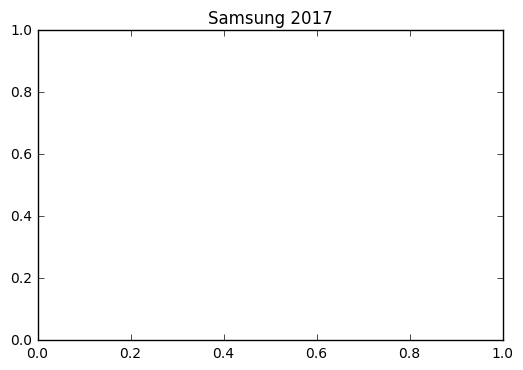

In [20]:
plt.show()

In [14]:
vol_chart = plt.subplot2grid((4,1),(2,0), rowspan = 1)
vol_chart.bar(DataFrame.index, DataFrame['Volume'], color = 'c')

<Container object of 4467 artists>

In [15]:
signal_chart = plt.subplot2grid((4,1), (3,0), rowspan=1)
signal_chart.plot(DataFrame.index, DataFrame['diff'].fillna(0), color = 'g')
plt.axhline(y=0, linestyle = '--', color = 'k')

In [21]:
prev_key = prev_val = 0

for key, val in DataFrame['diff'][1:].iteritems():
    if val == 0:
        continue
    elif val * prev_val < 0 and val > prev_val:
        signal_chart.annotate('Buy', xy = (key, DataFrame['diff'][key]), xytext=(10,-30),
                   textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    elif val * prev_val < 0 and val < prev_val:
        ax.annotate('Cell', xy = (key, DataFrame['diff'][key]), xytext=(10,30),
                   textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    prev_key, prev_val = key, val

1. Clipboard에 있는것을 pandas형식으로 저장
 - 웹페이지의 단어를 Copy : <a href ="http://www.koreabaseball.com/teamrank/teamrank.aspx"> 야구 순위 </a>

In [ ]:
DataFrame = pd.read_clipboard()